In [2]:
from pathlib import Path

root_path = Path('/Users/Aksha/github/Re-Implementation/src/fsrcnn')
Path.exists(root_path)

True

In [5]:
dataset_path = root_path / "dataset"
train_path = dataset_path / "train"
val_path = dataset_path / "val"
test_path = dataset_path / "test"

Path.exists(train_path), Path.exists(val_path), Path.exists(test_path)

(True, True, True)

In [13]:
import glob 
import numpy
import cv2

for image in glob.glob('{}/*'.format(train_path)): 
    img = cv2.imread(image)
    print(img.shape)

(176, 197, 3)
(129, 142, 3)
(190, 207, 3)
(119, 114, 3)
(179, 187, 3)
(163, 157, 3)
(199, 212, 3)
(160, 174, 3)
(149, 155, 3)
(129, 143, 3)
(178, 179, 3)
(179, 172, 3)
(78, 78, 3)
(111, 123, 3)
(132, 150, 3)
(122, 128, 3)
(107, 116, 3)
(198, 210, 3)
(131, 149, 3)
(174, 241, 3)
(164, 187, 3)
(154, 189, 3)
(155, 191, 3)
(151, 136, 3)
(146, 232, 3)
(132, 218, 3)
(137, 198, 3)
(121, 182, 3)
(181, 230, 3)
(176, 215, 3)
(241, 431, 3)
(200, 333, 3)
(209, 314, 3)
(188, 227, 3)
(211, 315, 3)
(185, 365, 3)
(187, 279, 3)
(153, 251, 3)
(145, 275, 3)
(233, 508, 3)
(195, 245, 3)
(182, 247, 3)
(242, 334, 3)
(155, 151, 3)
(262, 330, 3)
(198, 424, 3)
(213, 324, 3)
(277, 285, 3)
(185, 276, 3)
(198, 291, 3)
(137, 240, 3)
(134, 278, 3)
(202, 219, 3)
(223, 319, 3)
(168, 178, 3)
(191, 246, 3)
(139, 266, 3)
(165, 238, 3)
(202, 245, 3)
(178, 220, 3)
(176, 215, 3)
(197, 395, 3)
(153, 182, 3)
(190, 180, 3)
(105, 119, 3)
(350, 387, 3)
(240, 336, 3)
(298, 383, 3)
(309, 316, 3)
(188, 272, 3)
(330, 218, 3)
(157, 37

In [16]:
import os 

for dirpath, dirnames, filenames in os.walk(dataset_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

TypeError: 'int' object is not callable

Image path: \Users\Aksha\github\Re-Implementation\src\fsrcnn\dataset\train\tt25.png
Image height: 320
IMmage width: 432


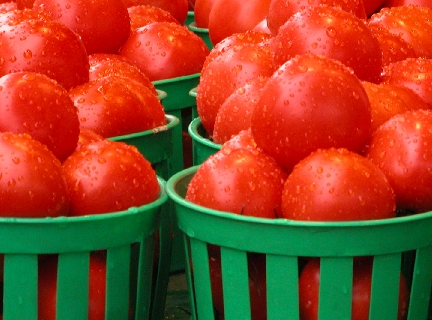

In [56]:
import random
from PIL import Image

random.seed(42)
image_list = list(glob.glob("{}/*".format(train_path)))
random_list = random.choice(image_list)

img = Image.open(random_list)
print(f"Image path: {random_list}")
print(f"Image height: {img.height}")
print(f"IMmage width: {img.width}")
img

In [58]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)), 
    transforms.ToTensor()
])

In [83]:
for image in sorted(glob.glob("{}/*".format(train_path))): 
    train_images = []
    img = Image.open(image)

    for shrink in [1.0, 0.9, 0.8, 0.7, 0.6]: 
        for rotate in [0, 90, 180, 270]: 
            tmp = img.resize((int(img.width * shrink), int(img.height * shrink)), resample = Image.BICUBIC)
            tmp = tmp.rotate(rotate, expand=True),
            train_images.append(tmp)
train_images

[(<PIL.Image.Image image mode=RGB size=435x334>,),
 (<PIL.Image.Image image mode=RGB size=334x435>,),
 (<PIL.Image.Image image mode=RGB size=435x334>,),
 (<PIL.Image.Image image mode=RGB size=334x435>,),
 (<PIL.Image.Image image mode=RGB size=391x300>,),
 (<PIL.Image.Image image mode=RGB size=300x391>,),
 (<PIL.Image.Image image mode=RGB size=391x300>,),
 (<PIL.Image.Image image mode=RGB size=300x391>,),
 (<PIL.Image.Image image mode=RGB size=348x267>,),
 (<PIL.Image.Image image mode=RGB size=267x348>,),
 (<PIL.Image.Image image mode=RGB size=348x267>,),
 (<PIL.Image.Image image mode=RGB size=267x348>,),
 (<PIL.Image.Image image mode=RGB size=304x233>,),
 (<PIL.Image.Image image mode=RGB size=233x304>,),
 (<PIL.Image.Image image mode=RGB size=304x233>,),
 (<PIL.Image.Image image mode=RGB size=233x304>,),
 (<PIL.Image.Image image mode=RGB size=261x200>,),
 (<PIL.Image.Image image mode=RGB size=200x261>,),
 (<PIL.Image.Image image mode=RGB size=261x200>,),
 (<PIL.Image.Image image mode=R

In [87]:
import matplotlib.pyplot as plt

flattened_img = [image[0] for image in train_images]
transformed_images = [transforms(img) for img in flattened_img]

def plot_transformed_img(image_paths, transform, n=3, seed=42): 
    random.seed(seed)
    random_paths = random.sample(image_paths, k=n)
    for image in random_paths: 
        with Image.open(image) as file: 
            fig, ax = plt.subplot(1, 2)
            ax[0].imshow(file)
            ax[0].set_title(f"Original \nSize: {file.size}")

            trans_img = transformd(f).permute(1, 2, 0)
            ax[1].imshow(trans_img)
            ax[1].set_title(f"Transformed \nSize: {transformed_size.shape}")
            ax[1].axis("off")

plot_transformed_img(transformed_images, transforms, n=3, seed=42)

AttributeError: 'Tensor' object has no attribute 'read'